In [68]:
from sklearn.datasets import fetch_california_housing

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [70]:
california = fetch_california_housing()
type(california)
# data is having multiple dictionaries

sklearn.utils._bunch.Bunch

In [71]:
california
california.keys()
# tells about what constitutes our data

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [72]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [73]:
# value to be predicted
california.target_names
#price / output feature / rest are independent features

['MedHouseVal']

In [74]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [75]:
california.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [76]:
dataset = pd.DataFrame(california.data, columns = california.feature_names)
## california . data is numpy array 
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [77]:
dataset["Price"] =california.target

In [78]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [80]:
## findig missing values
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [81]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [82]:
dataset.corr()
#finding correlation of one feature to another

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

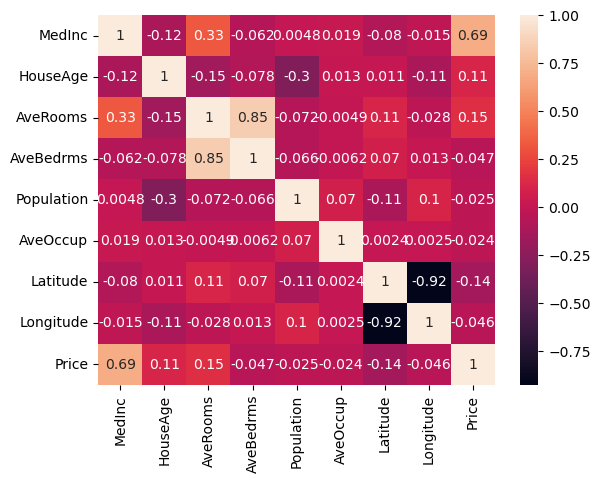

In [83]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot = True)

In [84]:
## divide data in between dep and indep features
X = dataset.iloc[:,:-1]  # independent features
# take all rowss , take all columns but leave last
y= dataset.iloc[:,-1]

In [85]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [86]:
## data divide into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state =10)

In [87]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape
# 8 shows number of columns

((13828, 8), (13828,), (6812, 8), (6812,))

In [88]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20303,5.2783,12.0,4.466019,0.980583,405.0,3.932039,34.16,-119.18
16966,3.9722,27.0,4.619271,1.096357,1877.0,2.205640,37.55,-122.31
10623,4.5094,12.0,4.426380,1.092025,1913.0,1.956033,33.67,-117.77
6146,3.1034,29.0,4.597222,1.037037,2013.0,4.659722,34.11,-117.95
2208,4.6726,6.0,5.730303,1.033333,969.0,2.936364,36.81,-119.87
...,...,...,...,...,...,...,...,...
13490,3.3571,17.0,6.083333,1.102713,1612.0,3.124031,34.06,-117.38
9340,4.1659,36.0,5.887545,1.053204,1899.0,2.296252,37.99,-122.59
17439,4.5486,32.0,5.525526,0.927928,828.0,2.486486,34.63,-120.45
2602,2.1542,17.0,7.045045,1.554054,517.0,2.328829,41.01,-123.52


In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
scaler = StandardScaler()

In [91]:
X_train = scaler.fit_transform(X_train)

In [92]:
X_test = scaler.transform(X_test)

In [95]:
print(type(X_train))
X_train

<class 'numpy.ndarray'>


array([[-0.72986836,  1.22081889, -0.70305988, ...,  0.05861244,
         0.96929441, -1.43979718],
       [-0.61046678, -0.28439808,  0.07828001, ...,  0.13015917,
        -0.75823526,  1.08204942],
       [ 0.00784578, -0.60128586, -0.2447376 , ..., -0.09793279,
         0.94594941, -1.2454256 ],
       ...,
       [ 0.88684913, -1.78961504, -0.21300658, ...,  0.09549475,
         0.78720344, -1.10587678],
       [-0.87672223,  0.50782138, -1.10043274, ...,  0.18513096,
        -0.77224225,  0.66838683],
       [-0.62742573, -0.99739558, -0.60483749, ..., -0.08418874,
         0.77786545, -1.15073176]])

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
regressor = LinearRegression()

In [98]:
regressor

LinearRegression()

In [99]:
regressor.fit(X_train,y_train)

LinearRegression()

In [101]:
regressor.coef_
# 8 coef for 8 variable

array([ 0.82872299,  0.1231163 , -0.27068752,  0.32859106,  0.00213572,
       -0.02810091, -0.93017985, -0.89505497])

In [102]:
regressor.intercept_

2.0634768086491184

In [103]:
# prediction for test
y_pred = regressor.predict(X_test)

In [104]:
y_pred

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])

In [106]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("mse",mean_squared_error(y_test,y_pred))
print("mae",mean_absolute_error(y_test,y_pred))
print("mrse",np.sqrt(mean_squared_error(y_test,y_pred)))


mse 0.552233239936362
mae 0.5371056943007959
mrse 0.743123973463622


In [109]:
# r2 and adj r2
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.5935958526436639

Text(0, 0.5, 'Test predicted')

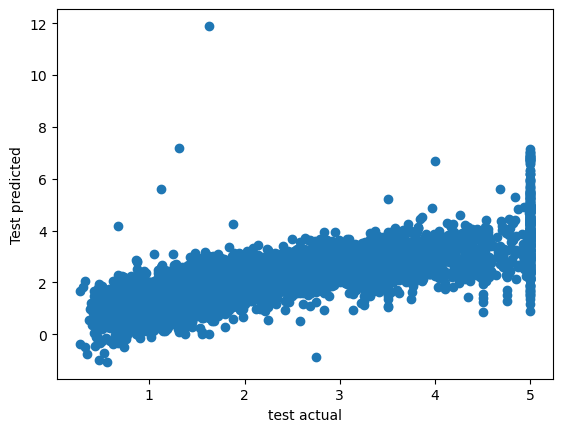

In [114]:
plt.scatter(y_test,y_pred)
plt.xlabel("test actual")
plt.ylabel("Test predicted")

In [111]:
# data is linear but very distributeed along the lines , worth trying but may not give best results

In [115]:
residuals = y_test-y_pred

In [116]:
residuals


20303   -1.329975
16966    0.960885
10623   -0.746908
6146    -0.307462
2208    -0.662167
           ...   
13490   -0.243475
9340     0.507182
17439   -1.366037
2602     0.046480
7180    -0.627770
Name: Price, Length: 6812, dtype: float64

C:\Users\thaku\AppData\Local\Temp\ipykernel_16808\2665350104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: xlabel='Price', ylabel='Density'>

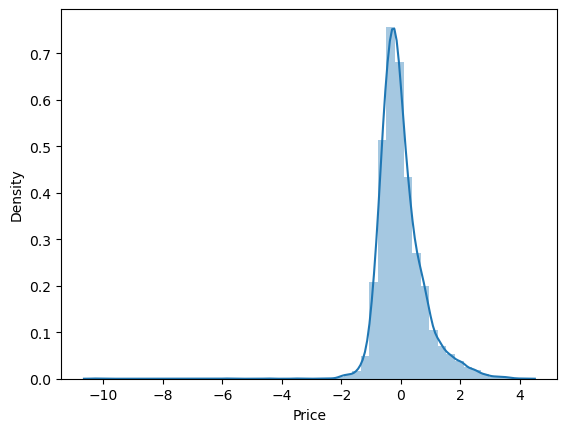

In [117]:
sns.distplot(residuals)

In [118]:
# normal distribution is there then ok model

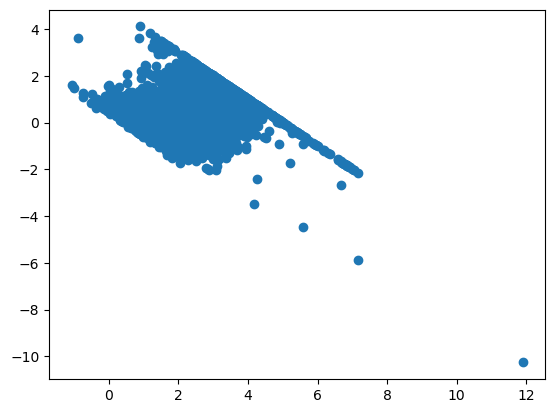

In [119]:
## scatter between y_pred and residuals
plt.scatter(y_pred, residuals)

In [120]:
# pickle 
# store the file into hard disk in the serialized format , we use wb , write byte 
# we can load the pickle file and use it directlt to make predictions on data

In [124]:
import pickle 
pickle.dump(regressor, open('multiple_regression.pkl','wb'))
# model stores in disk in serialzed format

In [126]:
loaded_model = pickle.load(open('multiple_regression','rb'))

In [129]:
loaded_model.predict(X_test)

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])